# DESCRIPCIÓN

Beta Bank ha detectado una disminución progresiva en su base de clientes, observando que, mes a mes, algunos de ellos han dejado de utilizar sus servicios. Los banqueros han identificado que retener a los clientes actuales es más rentable que adquirir nuevos.

El objetivo de este proyecto es desarrollar un modelo que prediga con precisión si un cliente está a punto de abandonar el banco, utilizando datos históricos sobre el comportamiento de los clientes y la finalización de sus contratos. Para evaluar el rendimiento del modelo, se utilizará la métrica F1, buscando alcanzar un valor mínimo de 0.59 en el conjunto de prueba.

Adicionalmente, se medirá el área bajo la curva (AUC-ROC) y se comparará con el valor de F1 para analizar su efectividad en la clasificación de cliente



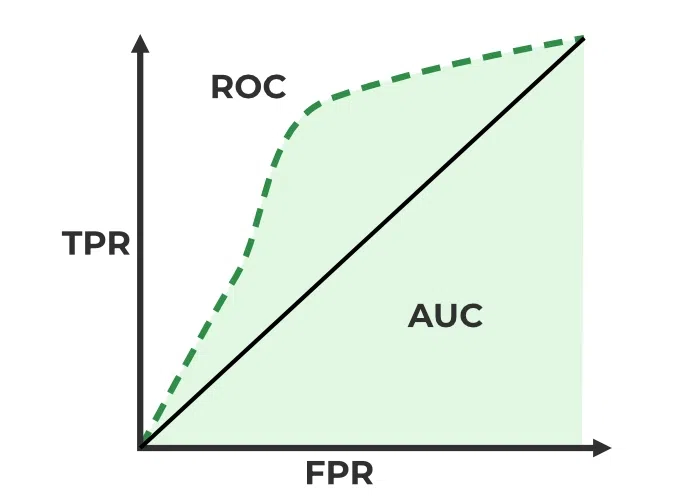

# 1 Dirección de los datos. 

En este proyecto se trabajara con el archivo de datos `/datasets/Churn.csv`, que contiene información histórica sobre el comportamiento de los clientes y la finalización de sus contratos con Beta Bank. A continuación se describe cada columna del conjunto de datos:

- `'RowNumber'` : Índice del conjunto de datos.
- `'CustomerId'`: Identificador único de cada cliente.
- `'Surname'`: Apellido del cliente.
- `'CreditScore'`: Puntuación de crédito del cliente.
- `'Geography'`: País de residencia del cliente.
- `'Gender'`: Género del cliente.
- `'Age'`: Edad del cliente.
- `'Tenure'`: Duración del depósito a plazo fijo del cliente (en años).
- `'Balance'`: Saldo de la cuenta del cliente.
- `'NumOfProducts'`: Número de productos bancarios que utiliza el cliente.
- `'HasCrCard'`: Indica si el cliente posee una tarjeta de crédito (1 - sí; 0 - no).
- `'IsActiveMember'`: Indica si el cliente es un miembro activo (1 - sí; 0 - no).
- `'EstimatedSalary'`: Salario estimado del cliente.

   **Objetivo:**

- `'Exited'`: El cliente se ha ido (1 - sí; 0 - no)

# 1.1 Inicialización.

In [1]:
!pip install -U imblearn

In [2]:
# Cargar todas las librerías a usar en el proyecto. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Importar la función train_test_split desde la librería sklearn 
from sklearn.model_selection import train_test_split

# Importar la función del Bosque aleatorio 
from sklearn.ensemble import RandomForestClassifier


#Importar la función de Valor F1
from sklearn.metrics import f1_score

#Importar la función de Curva AUC-ROC
from sklearn.metrics import roc_auc_score

#Importar la función de la curva ROC
from sklearn.metrics import roc_curve

#Importar la función de Escalado de características
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

# 1.2 Cargar los datos. 

In [3]:
# Carga los archivos
data = pd.read_csv('/datasets/Churn.csv')

# 1.3 Análisis de los datos

In [4]:
#Obtener la inofrmación de las bases de datos  con la cual se esta trabajando 
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# Obtener las 10 primeras filas de las bases de datos 
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


# 1.4  Verificación de los datos.

In [6]:
#Verificación de que no haya duplicado. 

duplicados= data.duplicated().sum()
print(f'Se encontro que hay: {duplicados} duplicados en el DataFrame de Churn')

Se encontro que hay: 0 duplicados en el DataFrame de Churn


In [7]:
#comprobar los valores  ausentes 
data_mis = data.isna().sum()
print(data_mis)

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64


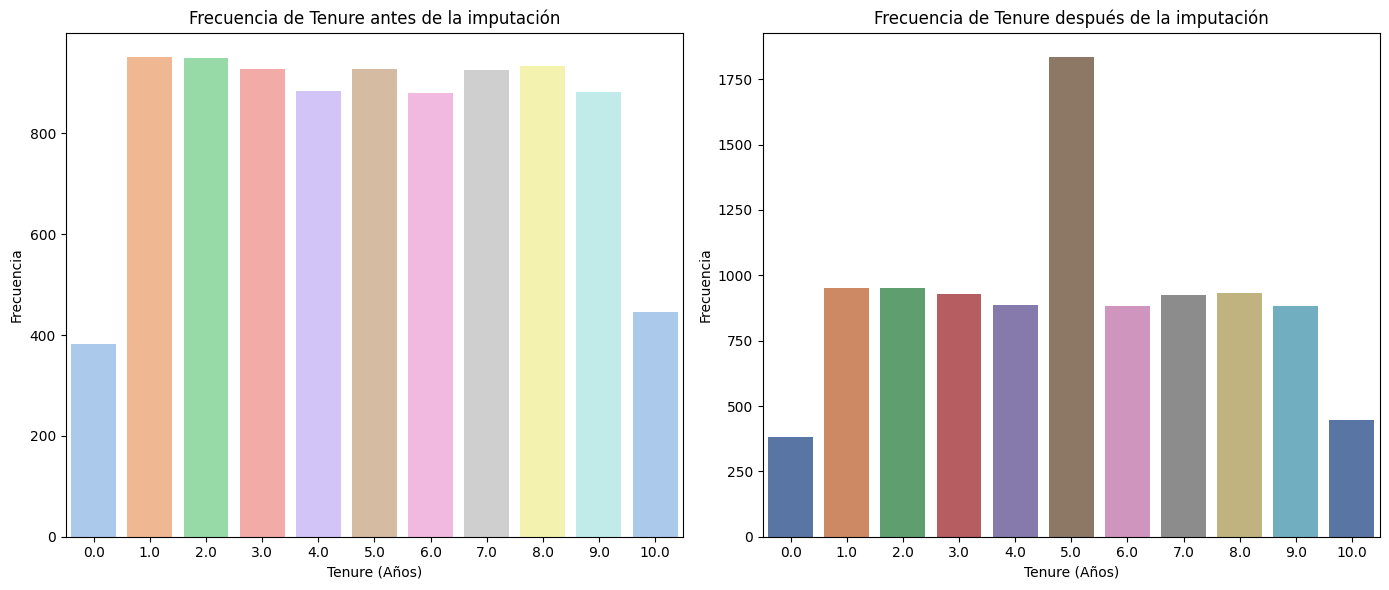

In [8]:
# Comparar Tenure antes y después de la imputación

# Crear datos de ejemplo para antes
tenure_before = data['Tenure'].copy()  

# Imputación de valores faltantes en 'Tenure' usando la mediana
median_tenure = data['Tenure'].median()
data['Tenure'].fillna(median_tenure, inplace=True)

# Crear datos de ejemplo para después
tenure_after = data['Tenure'].copy()  

# Crear la figura con subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de barras para Tenure antes de la imputación
sns.countplot(x=tenure_before, palette='pastel',  ax=axes[0])
axes[0].set_title('Frecuencia de Tenure antes de la imputación')
axes[0].set_xlabel('Tenure (Años)')
axes[0].set_ylabel('Frecuencia')

# Gráfico de barras para Tenure después de la imputación
sns.countplot(x=tenure_after, palette='deep', ax=axes[1])
axes[1].set_title('Frecuencia de Tenure después de la imputación')
axes[1].set_xlabel('Tenure (Años)')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Al realizar la imputacón a `Ternure`se pudo observar un antes y después con la ayuda de los gráficos. En cual se utilizó la media para llenar los **909** datos faltantes. Con esto nos ayudara a tener mejor estudio sobre los datos y nos dara mayot exactitud. 

In [9]:
# Eliminar columnas irrelevantes
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])


# 2. Preparación de los datos


# 2.1 Codificación One-Hot

Para la codificación One-Hot se visualizó que las columnas de 'Geography' y 'Gender' son variables categóricas.

In [10]:
data_one =  pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)
data_one

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1


# 2.2 Escalado de características

In [11]:
# Separar target y features
target = data_one['Exited']
features = data_one.drop('Exited', axis=1)

# Dividir los datos en conjuntos de entrenamiento y validación
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

# Definir las columnas numéricas que serán escaladas
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar el escalador solo en el conjunto de entrenamiento y transformarlo
features_train_scaled = features_train.copy()  # Crear una copia para evitar SettingWithCopyWarning
features_valid_scaled = features_valid.copy()

# Escalar los datos
scaler.fit(features_train_scaled[numeric])
features_train_scaled[numeric] = scaler.transform(features_train_scaled[numeric])
features_valid_scaled[numeric] = scaler.transform(features_valid_scaled[numeric])

# Mostrar los primeros datos escalados
print(features_train_scaled.head())
 
# Mostrar los primeros datos escalados
print(features_train_scaled.head())
print()
print()
# Verificar los tamaños de los conjuntos
print(features_train.shape, features_valid.shape)

      CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
226      0.442805 -0.841274  1.446098 -1.224577       0.817772          1   
7756    -0.310897 -0.270730  0.719099  0.641783      -0.896874          1   
2065    -0.259274 -0.556002  1.082599 -1.224577       0.817772          1   
2800     1.217157  1.155631  1.446098  1.290462       0.817772          1   
7028     0.690598 -1.221637 -0.007900  1.142121      -0.896874          0   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
226                1        -1.269750                  0                0   
7756               1         0.960396                  0                1   
2065               0         0.661864                  0                0   
2800               0        -1.039476                  0                0   
7028               0        -0.851729                  1                0   

      Gender_Male  
226             0  
7756            0  
2065          

# 2.3 Investigación del Desequilibrio de Clases

In [12]:
# Comprobación del equilibrio de clases
print(data_one['Exited'].value_counts(normalize=True))

0    0.7963
1    0.2037
Name: Exited, dtype: float64


Este resultado indica que hay un desequilibrio de clases en los datos, ya que la mayoría de los clientes (alrededor del 80%) no han dejado el banco, mientras que solo el 20% sí lo ha hecho.

# 3 Modelo

# 3.1 BOSQUE ALEATORIO 

In [13]:
data_one_encoded = pd.get_dummies(data_one, drop_first=True)

# Dividir el dataset usando los datos codificados
train_data, temp_data = train_test_split(data_one_encoded, test_size=0.4, random_state=54321)
valid_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=54321)

# Separar las características (features) y la variable objetivo (target)
features_train = train_data.drop(['Exited'], axis=1)
target_train = train_data['Exited']
features_valid = valid_data.drop(['Exited'], axis=1)
target_valid = valid_data['Exited']
features_test = test_data.drop(['Exited'], axis=1)
target_test = test_data['Exited']

# Escalar las características numéricas
scaler = StandardScaler()
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Escalar los datos numéricos
features_train[numeric_features] = scaler.fit_transform(features_train[numeric_features])
features_valid[numeric_features] = scaler.transform(features_valid[numeric_features])
features_test[numeric_features] = scaler.transform(features_test[numeric_features])


# Entrenar el modelo
best_model = RandomForestClassifier(n_estimators=40, random_state=54321)
best_model.fit(features_train, target_train)


# Evaluación en el conjunto de validación
valid_predictions = best_model.predict(features_valid)
valid_f1 = f1_score(target_valid, valid_predictions)
valid_roc_auc = roc_auc_score(target_valid, best_model.predict_proba(features_valid)[:, 1])

print(f"F1-score en el conjunto de validación: {valid_f1}")
print(f"AUC-ROC en el conjunto de validación: {valid_roc_auc}")


# Evaluar en el conjunto de prueba
test_predictions = best_model.predict(features_test)
test_f1 = f1_score(target_test, test_predictions)
test_roc_auc = roc_auc_score(target_test, best_model.predict_proba(features_test)[:, 1])

print(f"F1-score en el conjunto de prueba: {test_f1}")
print(f"AUC-ROC en el conjunto de prueba: {test_roc_auc}")

F1-score en el conjunto de validación: 0.5428109854604201
AUC-ROC en el conjunto de validación: 0.8422171875
F1-score en el conjunto de prueba: 0.5974395448079659
AUC-ROC en el conjunto de prueba: 0.8510931839402429


Al evaluar el desempeño del modelo de **RandomForestClassifier**, se puede apreciar los siguientes resultados:

- En el conjunto de prueba se logró obtener en F1-score un **59.74%**, mientras que en el conjunto de validación fue de **54.28%**. El F1-score es una métrica que equilibra la precisión y la sensibilidad, por lo que un resultado en torno al 60% indica que el modelo tiene dificultades para predecir correctamente la clase positiva, en este caso sería los usuarios que abandonan. Esto sugiere que, aunque el modelo tiene cierto poder predictivo. Este podría estar fallando en identificar de manera precisa a los usuarios que efectivamente abandonan el banco.

- El modelo se obtuvo un AUC-ROC de **85.09%** en el conjunto de prueba y **84.22%** en el conjunto de validación. El AUC-ROC es una métrica que mide la capacidad del modelo para distinguir entre clases, usuarios que abandonan y los que no. Un valor cercano al **85%** indica que el modelo tiene un buen rendimiento en general para separar las clases, lo que significa que es relativamente efectivo para predecir tanto abandonos como no abandonos. Sin embargo, dado que el AUC-ROC mide el área bajo la curva ROC, esta métrica puede estar sesgada hacia la clase mayoritaria, lo que sugiere que el modelo está mejor optimizado para predecir los usuarios que no abandonan, en  este caso sería la clase negativa. 

# 4. Correción del desequilibrio de clases 

In [14]:
# Combinar características y objetivo en un solo DataFrame
train_data = pd.concat([features_train, target_train], axis=1)

# Separar las clases
class_0 = train_data[train_data['Exited'] == 0]
class_1 = train_data[train_data['Exited'] == 1]

# Sobremuestreo de la clase minoritaria
class_1_oversampled = resample(class_1, replace=True, n_samples=len(class_0), random_state=12345)

# Combinar las clases
train_oversampled = pd.concat([class_0, class_1_oversampled])

# Separar nuevamente características y objetivo
features_train_oversampled = train_oversampled.drop(columns=['Exited'])
target_train_oversampled = train_oversampled['Exited']

# Entrenar el modelo con los datos balanceados
model_oversampled = RandomForestClassifier(random_state=12345)
model_oversampled.fit(features_train_oversampled, target_train_oversampled)



# Evaluar en el conjunto de validación
pred_valid_oversampled = model_oversampled.predict(features_valid)
f1_valid_oversampled = f1_score(target_valid, pred_valid_oversampled)
roc_auc_valid_oversampled = roc_auc_score(target_valid, model_oversampled.predict_proba(features_valid)[:, 1])

# Calcular la exactitud en el conjunto de validación
valid_score_oversampled = model_oversampled.score(features_valid, target_valid)

# Imprimir resultados
print(f"F1-Score (validación, sobremuestreo): {f1_valid_oversampled}")
print(f"AUC-ROC (validación, sobremuestreo): {roc_auc_valid_oversampled}")
print(f"Exactitud en el conjunto de validación (sobremuestreo): {valid_score_oversampled}")

#Fuente: https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html

F1-Score (validación, sobremuestreo): 0.5872340425531914
AUC-ROC (validación, sobremuestreo): 0.84421796875
Exactitud en el conjunto de validación (sobremuestreo): 0.8545


Con los resultados que se obtuvieron en la función **resample** se pudo observar lo siguiente:

- Se obtuvo una exactitud del 85.45% lo cual sugiere que es alta. Por lo general, nos indica que hace las predicciones son correctas pero esto podría estar sesgado hacia la clase mayorista. En este caso sería a los que no se han salido del banco.
- Con la función de AUC-ROC se logró obtener un **58.72%** Lo que puede sugerir que el modelo no es completamente efectivo para predecir a los usuarios que abandonan (clase positiva).
- En el caso F1-score se logró obtener **58.72%** lo que sugiere que el modelo aún tiene dificultades para equilibrar la predicción de usuarios que abandonan. Podría ser necesario mejorar el recall o la precisión de esta clase.

In [16]:
data_one_encoded = pd.get_dummies(data_one, drop_first=True)

# Dividir el dataset usando los datos codificados
train_data, temp_data = train_test_split(data_one_encoded, test_size=0.4, random_state=54321)
valid_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=54321)

# Separar las características (features) y la variable objetivo (target)
features_train = train_data.drop(['Exited'], axis=1)
target_train = train_data['Exited']

features_valid = valid_data.drop(['Exited'], axis=1)
target_valid = valid_data['Exited']

features_test = test_data.drop(['Exited'], axis=1)
target_test = test_data['Exited']

# Escalar las características numéricas
scaler = StandardScaler()
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Escalar los datos numéricos
features_train[numeric_features] = scaler.fit_transform(features_train[numeric_features])
features_valid[numeric_features] = scaler.transform(features_valid[numeric_features])
features_test[numeric_features] = scaler.transform(features_test[numeric_features])


# Entrenar el modelo
best_model = RandomForestClassifier(n_estimators=100, random_state=54321, class_weight='balanced')
best_model.fit(features_train, target_train)


# Evaluación en el conjunto de validación
valid_predictions = best_model.predict(features_valid)
valid_f1 = f1_score(target_valid, valid_predictions)
valid_roc_auc = roc_auc_score(target_valid, best_model.predict_proba(features_valid)[:, 1])

print(f"F1-score en el conjunto de validación: {valid_f1}")
print(f"AUC-ROC en el conjunto de validación: {valid_roc_auc}")

print()
print() 

# Evaluar en el conjunto de prueba
test_predictions = best_model.predict(features_test)
test_f1 = f1_score(target_test, test_predictions)
test_roc_auc = roc_auc_score(target_test, best_model.predict_proba(features_test)[:, 1])

print(f"F1-score en el conjunto de prueba: {test_f1}")
print(f"AUC-ROC en el conjunto de prueba: {test_roc_auc}")

F1-score en el conjunto de validación: 0.5379537953795379
AUC-ROC en el conjunto de validación: 0.8480085937499999


F1-score en el conjunto de prueba: 0.6000000000000001
AUC-ROC en el conjunto de prueba: 0.8577396825396826
